In [1]:
# load the dataset

from sklearn import datasets

iris_ = datasets.load_iris()
iris_data_ = iris_.data
iris_target_ = iris_.target

In [2]:
# see descr

print(iris_.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# nparray -> dataframe

import pandas as pd

iris_data = pd.DataFrame(iris_data_, columns=iris_.feature_names)
iris_target = pd.DataFrame(iris_target_, columns=["target"])

# concat
iris = pd.concat([iris_data, iris_target], axis=1)

# store target names
iris_target_names = iris_.target_names

In [4]:
# check the first 5 rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# see info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
# descr of numerical data
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


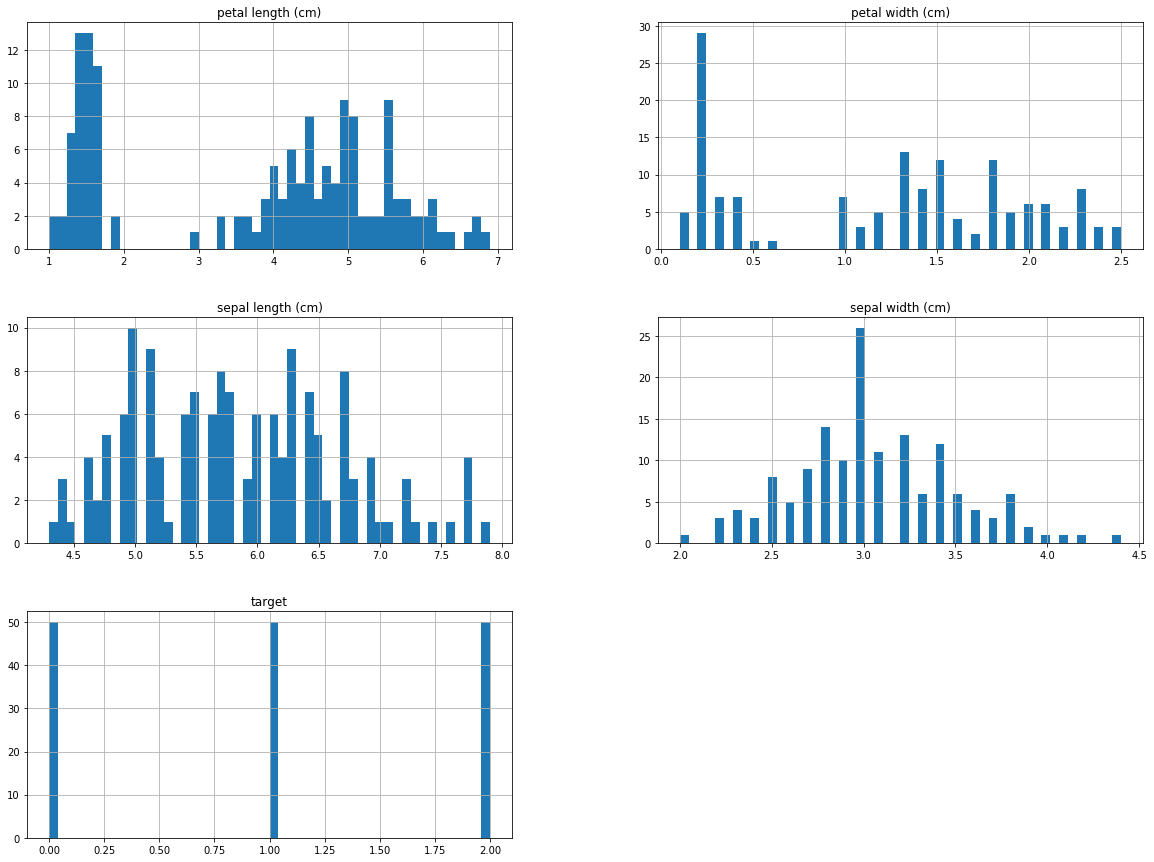

In [7]:
# hist
import matplotlib.pyplot as plt
%matplotlib inline

iris.hist(bins=50, figsize=(20, 15))
plt.show()

In [53]:
# create a test set
from sklearn.model_selection import train_test_split

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_data, iris_target, random_state=42)

((112, 1), (38, 1))

In [8]:
# make a copy
iris_explore = iris.copy()

In [9]:
# corr
corr_matrix = iris_explore.corr()

In [14]:
# sort
corr_matrix["target"].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

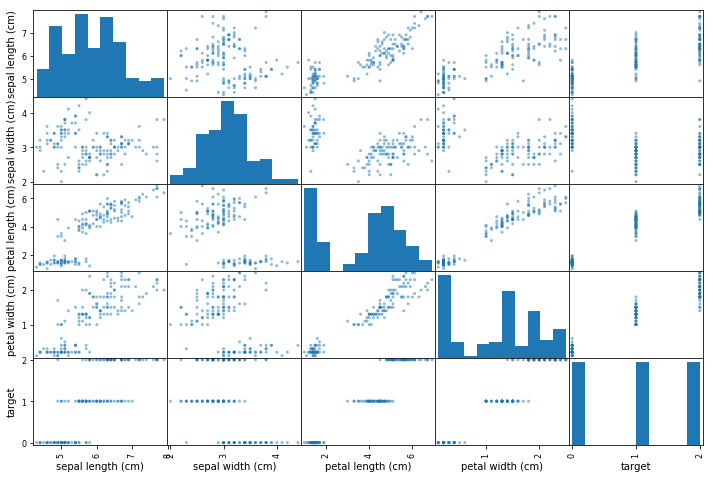

In [29]:
# plot attrs with high corr
from pandas.plotting import scatter_matrix

attrs_list = iris_.feature_names + ["target"]
scatter_matrix(iris_explore[attrs_list], figsize=(12, 8))
plt.show()

\[notes i\](1) is it necessary to explore the corr since it's not a reg task?

In [34]:
# create new attrs
iris_explore["petal"] = iris_explore["petal width (cm)"] * iris_explore["petal length (cm)"]
iris_explore["sepal"] = iris_explore["sepal length (cm)"] * iris_explore["sepal width (cm)"]

In [38]:
# check the corr again
corr_added_attrs = iris_explore.corr()
corr_added_attrs["target"].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal                0.950123
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal                0.295687
sepal width (cm)    -0.426658
Name: target, dtype: float64

In [59]:
# mkae a copy for training models
iris_X_select = iris_X_train
iris_y_select = iris_y_train

((112, 4), (112, 1))

In [60]:
# train a model
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(iris_X_select, iris_y_select)

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
# predict
some_data = iris_X_select[:5]
some_labels = iris_y_select[:5]

print(logistic_reg.predict(some_data))
print(list(some_labels["target"]))

[0 0 2 1 1 0 0 1 2 2 1 2 1 2 2 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1
 2 2 1 0 1 2 0 0 1 1 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2
 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1
 2]
[0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2]


In [78]:
# predict using cv
from sklearn.model_selection import cross_val_predict
logistic_cv_pred = cross_val_predict(logistic_reg, iris_X_select, iris_y_select, cv=3, method="predict")

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConvers

In [80]:
# measure using the cv curve
from sklearn.metrics import precision_score, recall_score

# precision_score(iris_y_select, logistic_cv_pred): Target is multiclass but average='binary'. Please choose another average setting.

ValueError: Target is multiclass but average='binary'. Please choose another average setting.